# Capstone Project - The Battle of the Neighborhoods 



## Exploring neighborhoods in Pune,Maharashtra








##### By Nandhitha.V 




## I. Introduction 

Pune also called Poona, is the second largest city in the Indian state of Maharashtra, after Mumbai. It is the ninth most populous city in the country with an estimated population of 6.4 million. Pune is ranked the number one city in India in the ease of living ranking index. But, for someone who is new to this state, it's puzzling to figure a neighborhood to settle.

I have recently got transferred to Pune for work. Which neighborhoods had got vegetarian restaurants? Which neighborhoods have shopping malls and theatres? Which neighborhoods are great for a coffee? Which neighborhoods are famous for its markets? Where are the ATMs? were the questions running on my mind as a new resident. So, in this capstone project, i am going to find a good neighborhood location in Pune to stay in by using data science methods and algorithms like clustering.


## II. Data

The required data to do this project is as follows:

* Latitude and Longitude of neighborhood 


* List of neighborhoods in Pune, Maharashtra
 
 
* Venue data(restaurants, ATM, theatres) of neighborhoods

###  Data sources

Following data sources will be needed to extract the required information:


* Web scraping data from Wikipedia to get information on Pune neighborhoods using Beautiful soup.
   
   The link to the data is : 'https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Pune'
    

* Generating Longitude and Longitude coordinates of Pune as well the neighborhoods via geocoder , geopy package.


* Using Foursquare API to create a map of Pune and also to generate the venue data related to the neighborhood.


## III. Methodology

The project is done following the seven Data Science methodology phases. 
The methodology will include:

   * Firstly, packages such as numpy, pandas, folium, k-means, geopy etc which are required to do the project are imported.
   

   * Generating the data required from Wikipedia 'https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Pune' by web scraping using Beautiful        soup.Used functions like decompose for data cleaning which removes the unnecessary data from the website.
     
    
   * The data collected includes the names of the neighborhoods in Pune and is converted into a dataframe.
   
   
   * The geocodes(latitude and longitude) of the neighborhoods are generated using the Nominatim from geopy.geocoders package.
   
   
   * A data-driven map of Pune is generated using folium package by adding location markers to it.
   

   * The venues for each neighborhood is collected using the forsquare API by providing the credentials,latitude,longitude,version and url.
   
   
   * The number of unique neighborhoods,venues,venue categories in the dataframe is printed.
   
   
   * Top 5 Neighborhoods with most venue categories is depicted using a pie chart.
   
   
   * A search query is written to find and explore the vegetarian restaurants in the neighborhood.
   
   
   * The get_dummies method of pandas library is then used and the categories of venues is got.
   
   
   * Then group_by is used to group rows of dataframe by location and the mean of the frequency of occurrence of each category in every                location is found.
   
   
   * Top five categories of each neighborhood is printed with the frequency.
   
   
   * A function called return_most_common_venues is used to return ten most common venues in each neighborhood  for easy-understanding.
   
   
   * K-means algorithm is an iterative algorithm that tries to partition the dataset into K pre-defined distinct non-overlapping subgroups              called clusterss. So, here k-means clustering is performed on the most common places of the neighborhood with k=2.Labels are assigned for          each clsuter to differentiate..
   
   
   * Map of Pune before and after clustering is compared and visualized.
   
   
   * Clusters are examined to derive cool insights from it.
    

###  a) Importing packages

In [3]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import requests
import random # library for random number generation
import lxml
import folium
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
print("Imported packages")

Imported packages


In [2]:
!pip install folium

     |████████████████████████████████| 92kB 7.3MB/s eta 0:00:011


### b) Web Scraping the data

In [4]:
txt=requests.get('https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Pune').text

In [5]:
soup = BeautifulSoup(txt,'lxml')

### c) Data Cleaning

In [6]:
first_list = soup.find(class_='toc')
first_list.decompose()

In [7]:
cont=soup.find('ul')
pu=cont.findAll('li')
pun=[]
for p in pu:
    pun.append(p.text)   
pun[6]="Bhamburde"
pun

['Ambegaon',
 'Aundh',
 'Baner',
 'Bavdhan Khurd',
 'Bavdhan Budruk',
 'Balewadi',
 'Bhamburde',
 'Bibvewadi',
 'Bhugaon',
 'Bhukum',
 'Dhankawadi',
 'Dhanori',
 'Dhayari',
 'Erandwane',
 'Fursungi',
 'Ghorpadi',
 'Hadapsar',
 'Hingne Khurd',
 'Karve Nagar',
 'Kalas',
 'Katraj',
 'Khadki',
 'Kharadi',
 'Kondhwa',
 'Koregaon Park',
 'Kothrud',
 'Manjri',
 'Markal',
 'Mohammed Wadi',
 'Mundhwa',
 'Nanded',
 'Parvati',
 'Panmala',
 'Pashan',
 'Pirangut',
 'Shivane',
 'Sus',
 'Undri',
 'Vishrantwadi',
 'Vitthalwadi',
 'Vadgaon Khurd',
 'Vadgaon Budruk',
 'Wadgaon Sheri',
 'Wagholi',
 'Wanowrie',
 'Warje',
 'Yerwada']

#### Converting into DataFrame

In [8]:
pune =pd.DataFrame({'Neighborhood':pun,'Latitude':0,'Longitude':0})
pune.head()

,Neighborhood,Latitude,Longitude
0,Ambegaon,0,0
1,Aundh,0,0
2,Baner,0,0
3,Bavdhan Khurd,0,0
4,Bavdhan Budruk,0,0


### d) Finding the latitude and longitude

In [9]:
geo=Nominatim()
for i in range(pune.shape[0]):
    name=pune.loc[i,'Neighborhood']+",Pune"
    try:
        loc=geo.geocode(name)
        pune.loc[i,'Latitude']=loc.latitude           #Selecting columns  using column labels with loc function
        pune.loc[i,'Longitude']=loc.longitude
    except:
        print(name)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  if __name__ == '__main__':


Bhamburde,Pune
Dhankawadi,Pune
Erandwane,Pune
Kalas,Pune
Manjri,Pune
Markal,Pune
Panmala,Pune
Vadgaon Khurd,Pune


In [10]:
pune.loc[6,'Latitude']=18.5512
pune.loc[6,'Longitude']=73.3773
pune.loc[10,'Latitude']=18.4573
pune.loc[10,'Longitude']=73.8507
pune.loc[13,'Latitude']= 18.5134
pune.loc[13,'Longitude']=73.8331 
pune.loc[19,'Latitude']= 18.5861
pune.loc[19,'Longitude']=73.8743
pune.loc[26,'Latitude']=18.523
pune.loc[26,'Longitude']=73.9852
pune.loc[27,'Latitude']=18.6719
pune.loc[27,'Longitude']=73.9654
pune.loc[32,'Latitude']=18.4999 
pune.loc[32,'Longitude']=73.8404
pune.loc[40,'Latitude']=18.4492
pune.loc[40,'Longitude']=73.8445

In [11]:
pune.head()

,Neighborhood,Latitude,Longitude
0,Ambegaon,19.031694,73.950030
1,Aundh,18.561883,73.810196
2,Baner,18.564243,73.776857
3,Bavdhan Khurd,18.313881,74.023109
4,Bavdhan Budruk,18.529135,73.778700


In [12]:
address = 'Pune'

geolocator = Nominatim(user_agent="my_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Pune are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Pune are 18.521428, 73.8544541.


### e) Map of Pune before clustering

In [13]:
pu=folium.Map(location=[latitude,longitude],zoom_start=12)
for name,lat,lon in zip(pune['Neighborhood'],pune['Latitude'],pune['Longitude']):                #Combining columns using zip
    folium.CircleMarker(
        location=[lat,lon],
        popup=name,
        radius=6,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
    ).add_to(pu)
pu

#### Defining Foursquare Credentials and Version

In [14]:
CLIENT_ID='411Z20UMEH2I3H23SAIH44Q05BQIKAPAUKFCEVVZYQ0MQWCS'
CLIENT_SECRET='V4O3IQSGNHKTYK5I2TDV4DMHO2SINEQND2DCMRJWVWSO3AVM'
ver='20180605'
lat=pune.loc[0,'Latitude']
lon=pune.loc[0,'Longitude']
url="https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&radius=600&limit=100&v={}".format(CLIENT_ID,\
     CLIENT_SECRET,lat,lon,ver)

In [15]:
fil=requests.get(url).json()['response']['groups'][0]['items']
fil

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4ffed26fe4b0ca9b90508501',
   'name': 'Ravikiran',
   'location': {'lat': 19.031082987492482,
    'lng': 73.95335509291483,
    'labeledLatLngs': [{'label': 'display',
      'lat': 19.031082987492482,
      'lng': 73.95335509291483}],
    'distance': 356,
    'cc': 'IN',
    'country': 'India',
    'formattedAddress': ['India']},
   'categories': [{'id': '4bf58dd8d48988d1d3941735',
     'name': 'Vegetarian / Vegan Restaurant',
     'pluralName': 'Vegetarian / Vegan Restaurants',
     'shortName': 'Vegetarian / Vegan',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 'groups': []}},
  'referralId': 'e-0-4ffed26fe4b0ca9b90508501-0'},
 {'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'typ

In [16]:
def return_venues(names,latitude,longitude):
    lis=[]
    for name,lat,lon in zip(names,latitude,longitude):
        print(name)
        url="https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&radius=600&limit=100&v={}".format(\
                                                                                            CLIENT_ID,CLIENT_SECRET,lat,lon,ver)
        results=requests.get(url).json()['response']['groups'][0]['items']
        lis.append([(name,lat,lon,ven['venue']['name']
             ,ven['venue']['location']['lat'],ven['venue']['location']['lng'],ven['venue']['categories'][0]['name']) for ven in results])
    data=pd.DataFrame([item for v in lis for item in v])
    data.columns=['Neighborhood','Latitude','Longitude','Venue','Venue Latitude','Venue Longitude','Venue Category']
    return data

In [17]:
venue=return_venues(pune['Neighborhood'],pune['Latitude'],pune['Longitude'])
venue.head()

Ambegaon
Aundh
Baner
Bavdhan Khurd
Bavdhan Budruk
Balewadi
Bhamburde
Bibvewadi
Bhugaon
Bhukum
Dhankawadi
Dhanori
Dhayari
Erandwane
Fursungi
Ghorpadi
Hadapsar
Hingne Khurd
Karve Nagar
Kalas
Katraj
Khadki
Kharadi
Kondhwa
Koregaon Park
Kothrud
Manjri
Markal
Mohammed Wadi
Mundhwa
Nanded
Parvati
Panmala
Pashan
Pirangut
Shivane
Sus
Undri
Vishrantwadi
Vitthalwadi
Vadgaon Khurd
Vadgaon Budruk
Wadgaon Sheri
Wagholi
Wanowrie
Warje
Yerwada


,Neighborhood,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ambegaon,19.031694,73.950030,Ravikiran,19.031083,73.953355,Vegetarian / Vegan Restaurant
1,Ambegaon,19.031694,73.950030,Hotel Malhar,19.034313,73.954420,Hotel
2,Ambegaon,19.031694,73.950030,Indraprasta,19.026795,73.951300,Fast Food Restaurant
3,Ambegaon,19.031694,73.950030,Hotel Indraprastha,19.026736,73.951590,Asian Restaurant
4,Aundh,18.561883,73.810196,Westend mall,18.561814,73.807220,Shopping Mall


In [18]:
print('There are {} unique neighborhoods.'.format(len(venue['Neighborhood'].unique())))

There are 41 unique neighborhoods.


In [19]:
print('{} venues were returned'.format(venue.shape[0]))

393 venues were returned


In [20]:
print('There are {} unique categories.'.format(len(venue['Venue Category'].unique())))

There are 111 unique categories.


In [21]:
print('There unique categories are  {}.'.format(venue['Venue Category'].unique()))

There unique categories are  ['Vegetarian / Vegan Restaurant' 'Hotel' 'Fast Food Restaurant'
 'Asian Restaurant' 'Shopping Mall' 'Multiplex' 'Mexican Restaurant'
 'Coffee Shop' 'Korean Restaurant' 'Jewelry Store' 'Dessert Shop'
 'Indian Restaurant' 'Grocery Store' 'Bakery' 'Restaurant'
 'Chocolate Shop' 'Ice Cream Shop' 'Sandwich Place'
 'Middle Eastern Restaurant' 'Plaza' 'Snack Place' 'Electronics Store'
 'Sporting Goods Shop' 'Mobile Phone Shop' 'Bus Station' 'Boutique'
 'Clothing Store' 'Motorcycle Shop' 'Café' 'Gourmet Shop' 'Breakfast Spot'
 'Donut Shop' 'Lake' 'Garden' 'Seafood Restaurant' 'Smoke Shop'
 'Department Store' 'Juice Bar' 'ATM' 'Convenience Store' 'Pharmacy'
 'Pool' 'Fruit & Vegetable Store' 'Bistro' 'Burger Joint' 'Pizza Place'
 'Chinese Restaurant' 'Deli / Bodega' 'South Indian Restaurant'
 'General Entertainment' 'Track' 'College Academic Building' 'Gym'
 'Train Station' 'Art Gallery' 'Lounge' 'Food' 'Zoo' 'Athletics & Sports'
 'North Indian Restaurant' 'Hookah Ba

In [22]:
count=venue.groupby('Neighborhood').count()
co=count.sort_values(by=['Venue Category'],ascending=False)
pie=co.head()
pie

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Mohammed Wadi,81,81,81,81,81,81
Aundh,40,40,40,40,40,40
Koregaon Park,36,36,36,36,36,36
Erandwane,32,32,32,32,32,32
Wanowrie,20,20,20,20,20,20


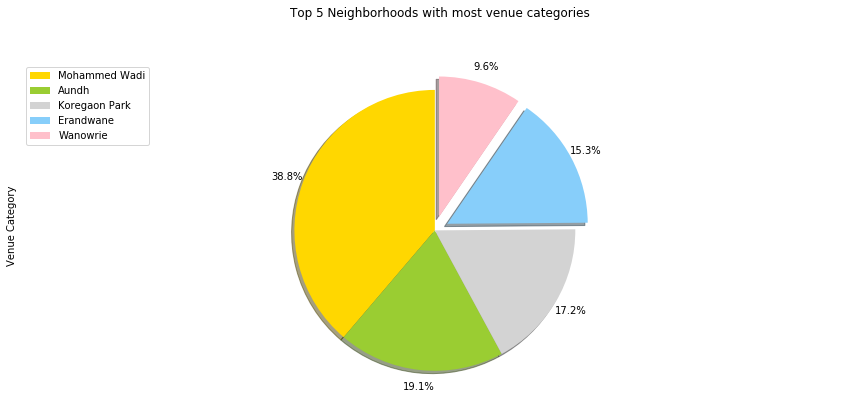

In [23]:
colors_list = ['gold', 'yellowgreen', 'lightgrey', 'lightskyblue', 'pink',]
explode_list = [0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

pie['Venue Category'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         
                            pctdistance=1.12,   
                            colors=colors_list,  
                            explode=explode_list
                            )


plt.title('Top 5 Neighborhoods with most venue categories', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=pie.index, loc='upper left') 

plt.show()

### f) Finding Vegetarian Restautants in the neighborhood 

In [24]:
search_query = 'Restaurant'
radius = 500
print(search_query + ' .... OK!')

Restaurant .... OK!


In [25]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e9f216e0de0d90028d8002e'},
 'response': {'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 19.037093555400006,
    'lng': 73.95573169604921},
   'sw': {'lat': 19.026293544599994, 'lng': 73.94432853436649}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ffed26fe4b0ca9b90508501',
       'name': 'Ravikiran',
       'location': {'lat': 19.031082987492482,
        'lng': 73.95335509291483,
        'labeledLatLngs': [{'label': 'display',
          'lat': 19.031082987492482,
          'lng': 73.95335509291483}],
        'distance': 356,
        'cc': 'IN',
        'country': 'India',
        'formattedAddress

## IV. Analysing each neighborhood

In [26]:
dum=pd.get_dummies(venue['Venue Category'],prefix="",prefix_sep="")
dum=pd.concat([venue['Neighborhood'],dum],axis=1)
dum.head()

,Neighborhood,ATM,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,...,Steakhouse,Sushi Restaurant,Tea Room,Theater,Track,Trail,Train Station,Vegetarian / Vegan Restaurant,Wine Shop,Zoo
0,Ambegaon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Ambegaon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ambegaon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ambegaon,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Aundh,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Grouping rows by location & the mean of the frequency of occurrence of each category

In [27]:
gp=dum.groupby('Neighborhood',as_index=True).mean().reset_index()
gp.head()

,Neighborhood,ATM,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,...,Steakhouse,Sushi Restaurant,Tea Room,Theater,Track,Trail,Train Station,Vegetarian / Vegan Restaurant,Wine Shop,Zoo
0,Ambegaon,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250,0.0,0.0
1,Aundh,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.025000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.0
2,Balewadi,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0
3,Baner,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.071429,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0
4,Bavdhan Budruk,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0


In [28]:
num_top_venues = 5

for hood in gp['Neighborhood']:
    print("----"+hood+"----")
    temp = gp[gp['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ambegaon----
                           venue  freq
0                          Hotel  0.25
1  Vegetarian / Vegan Restaurant  0.25
2               Asian Restaurant  0.25
3           Fast Food Restaurant  0.25
4             Mexican Restaurant  0.00


----Aundh----
                  venue  freq
0     Indian Restaurant  0.12
1         Shopping Mall  0.08
2            Restaurant  0.08
3  Fast Food Restaurant  0.08
4          Dessert Shop  0.05


----Balewadi----
                           venue  freq
0                     Restaurant   1.0
1                            ATM   0.0
2                       Pharmacy   0.0
3  Paper / Office Supplies Store   0.0
4                Other Nightlife   0.0


----Baner----
                  venue  freq
0     Indian Restaurant  0.29
1  Fast Food Restaurant  0.21
2        Ice Cream Shop  0.07
3                Bakery  0.07
4                  Café  0.07


----Bavdhan Budruk----
                  venue  freq
0     Indian Restaurant   0.2
1            Donut 

#### Finding common places in each loaction

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
pune_clus = pd.DataFrame(columns=columns)
pune_clus['Neighborhood'] = gp['Neighborhood']

for ind in np.arange(gp.shape[0]):
    pune_clus.iloc[ind,1:] = return_most_common_venues(gp.iloc[ind, :], num_top_venues)

pune_clus

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ambegaon,Vegetarian / Vegan Restaurant,Hotel,Asian Restaurant,Fast Food Restaurant,Zoo,Food,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant
1,Aundh,Indian Restaurant,Shopping Mall,Restaurant,Fast Food Restaurant,Ice Cream Shop,Coffee Shop,Sporting Goods Shop,Bus Station,Dessert Shop,Clothing Store
2,Balewadi,Restaurant,Zoo,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant
3,Baner,Indian Restaurant,Fast Food Restaurant,Café,Breakfast Spot,Gourmet Shop,Motorcycle Shop,Ice Cream Shop,Bakery,Restaurant,Farmers Market
4,Bavdhan Budruk,Fast Food Restaurant,Indian Restaurant,Garden,Donut Shop,Lake,Zoo,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant
5,Bhugaon,Lake,Asian Restaurant,Juice Bar,Seafood Restaurant,Food,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop
6,Bhukum,ATM,Food,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Electronics Store
7,Bibvewadi,Snack Place,Indian Restaurant,Ice Cream Shop,Café,Smoke Shop,Bakery,Seafood Restaurant,Department Store,Donut Shop,Diner
8,Dhankawadi,Snack Place,Café,Fast Food Restaurant,Dessert Shop,Convenience Store,Indian Restaurant,Coffee Shop,Breakfast Spot,Zoo,Dim Sum Restaurant
9,Dhanori,ATM,Pharmacy,Indian Restaurant,Grocery Store,Art Gallery,Asian Restaurant,Department Store,Dessert Shop,Dim Sum Restaurant,Diner


## IV. Clustering Neighborhoods

In [31]:

kclusters = 2
clus = gp.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(clus)
labels=kmeans.labels_
kmeans.labels_[0:10]
pune_clus['Label']=labels
#pune_clus.insert(1,"Label",labels)


### h) Map of Pune After Clustering

In [32]:
color=['#8A2BE2','#D2391F','#FF8C00']
pune_map=folium.Map(location=[18.521428, 73.8544541],zoom_start=11)
for name,lat,lon,lab in zip(pune_clus['Neighborhood'],pune['Latitude'],pune['Longitude'],pune_clus['Label']):
    folium.CircleMarker(location=[lat,lon],popup=name,radius=6,color=color[lab],
                       fill_color=color[lab],
                       fill_opacity=0.7).add_to(pune_map)
pune_map

## V. Results


The results of the modelling gives the below clusters.

The k-means clustering was performed with k=2.The data was divided into two clusters with label-0 and label-1.The total number of neighborhoods were 42.

* Cluster 0 - All the neighborhoods in the cluster have diversed venues mostly restaurants,coffee shops,malls,department stores etc as the first two common venues.


* Cluster 1 - The neighborhood in this cluster have other venues like furniture store,zoo etc  .

On examining the clusters ,it is clear that 40 neighborhoods are similar and thus it falls under the same cluster with the label-0.
The only neighborhoods which is different from the other are 'Undri' and thus it is falls into another cluster with label-1.

### i) Examining the clusters

In [33]:
pune_clus[pune_clus['Label']==0]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Label
0,Ambegaon,Vegetarian / Vegan Restaurant,Hotel,Asian Restaurant,Fast Food Restaurant,Zoo,Food,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,0
1,Aundh,Indian Restaurant,Shopping Mall,Restaurant,Fast Food Restaurant,Ice Cream Shop,Coffee Shop,Sporting Goods Shop,Bus Station,Dessert Shop,Clothing Store,0
2,Balewadi,Restaurant,Zoo,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,0
3,Baner,Indian Restaurant,Fast Food Restaurant,Café,Breakfast Spot,Gourmet Shop,Motorcycle Shop,Ice Cream Shop,Bakery,Restaurant,Farmers Market,0
4,Bavdhan Budruk,Fast Food Restaurant,Indian Restaurant,Garden,Donut Shop,Lake,Zoo,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,0
5,Bhugaon,Lake,Asian Restaurant,Juice Bar,Seafood Restaurant,Food,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,0
6,Bhukum,ATM,Food,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Electronics Store,0
7,Bibvewadi,Snack Place,Indian Restaurant,Ice Cream Shop,Café,Smoke Shop,Bakery,Seafood Restaurant,Department Store,Donut Shop,Diner,0
8,Dhankawadi,Snack Place,Café,Fast Food Restaurant,Dessert Shop,Convenience Store,Indian Restaurant,Coffee Shop,Breakfast Spot,Zoo,Dim Sum Restaurant,0
9,Dhanori,ATM,Pharmacy,Indian Restaurant,Grocery Store,Art Gallery,Asian Restaurant,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,0


In [34]:
pune_clus[pune_clus['Label']==1]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Label
32,Undri,Furniture / Home Store,Zoo,Food,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,1


## VI. Discussion

In this project, Analysis of Pune neighborhoods recommendations based on venue categories like restaurants,mall,coffee shops etc has been presented.  This will be a great recommendation for visitors like me who are new to the place to find out nearby venues of interest and in deciding a place to stay in.

* The generated results shows the 2 clusters associated with the neighborhoods.It is evident that Cluster 0 is the most representative of the Pune city. Just looking at this cluster, it shows there are 80% of restaurants,grocery stores,coffee shops,electronic stores which will make life easier if we stay in this neighborhood.


* On the other hand, as we observe Cluster 1, the percentage is less than 40% .There are not many restaurants in these area.But this place is has got  other spots like Furniture store,Zoo etc.



## VII. Conclusion

Using the combination of data from the url and the foursquare api,we were able to collect,clean,analyse,discover and examine the venues of the neighborhoods in Pune to find the best neighborhood to live in.

Since all the neighborhoods were similar with respect to the most common venues,and also likely to live,i would find a good place to stay in any of it other than the neighborhood 'Undri' which didn't seem to be a residential and accessible place.